In [1]:
from Config import Config, plot_rewards, print_cfgs
from Env import env_agent_config, all_seed
from Utils import test, train, to_tensor, plot
from Agent import DoubleDQN
import d2l.torch as d2l
import torch

Hyperparameters:
        Name        	       Value        	        Type        
     algo_name      	     DoubleDQN      	   <class 'str'>    
      env_name      	    CartPole-v1     	   <class 'str'>    
        seed        	        1234        	   <class 'int'>    
     train_eps      	        200         	   <class 'int'>    
      test_eps      	         30         	   <class 'int'>    
     max_steps      	        200         	   <class 'int'>    
  eval_per_episode  	         10         	   <class 'int'>    
      eval_eps      	         10         	   <class 'int'>    
       gamma        	        0.99        	  <class 'float'>   
         lr         	       0.0005       	  <class 'float'>   
   epsilon_start    	        0.95        	  <class 'float'>   
    epsilon_end     	        0.05        	  <class 'float'>   
   epsilon_decay    	        500         	   <class 'int'>    
    buffer_size     	        1000        	   <class 'int'>    
     batch_size     	        128      

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


回合：10/200，奖励：12.00，评估奖励：9.90，最佳评估奖励：9.90，更新模型！ 0.65
回合：20/200，奖励：12.00，评估奖励：9.60，最佳评估奖励：9.90，0.48
回合：30/200，奖励：14.00，评估奖励：9.60，最佳评估奖励：9.90，0.38
回合：40/200，奖励：37.00，评估奖励：9.60，最佳评估奖励：9.90，0.29
回合：50/200，奖励：10.00，评估奖励：9.10，最佳评估奖励：9.90，0.24
回合：60/200，奖励：10.00，评估奖励：10.40，最佳评估奖励：10.40，更新模型！ 0.20
回合：70/200，奖励：22.00，评估奖励：11.60，最佳评估奖励：11.60，更新模型！ 0.17
回合：80/200，奖励：12.00，评估奖励：10.00，最佳评估奖励：11.60，0.14
回合：90/200，奖励：12.00，评估奖励：9.30，最佳评估奖励：11.60，0.11
回合：100/200，奖励：11.00，评估奖励：9.30，最佳评估奖励：11.60，0.10
回合：110/200，奖励：25.00，评估奖励：9.60，最佳评估奖励：11.60，0.09
回合：120/200，奖励：38.00，评估奖励：14.10，最佳评估奖励：14.10，更新模型！ 0.08
回合：130/200，奖励：53.00，评估奖励：28.70，最佳评估奖励：28.70，更新模型！ 0.06
回合：140/200，奖励：48.00，评估奖励：62.70，最佳评估奖励：62.70，更新模型！ 0.05
回合：150/200，奖励：83.00，评估奖励：200.00，最佳评估奖励：200.00，更新模型！ 0.05
回合：160/200，奖励：200.00，评估奖励：200.00，最佳评估奖励：200.00，更新模型！ 0.05
回合：170/200，奖励：200.00，评估奖励：200.00，最佳评估奖励：200.00，更新模型！ 0.05
回合：180/200，奖励：200.00，评估奖励：200.00，最佳评估奖励：200.00，更新模型！ 0.05
回合：190/200，奖励：200.00，评估奖励：200.00，最佳评估奖励：200.00，更新模型！ 0.05
回合：200/200，

/home/wyq/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/wyq/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/wyq/Workspace/AttentionRL/StateAttentionDDQN/Config.py:45: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0, len(rewards), 10)  # 设置x轴的范围


回合：2/30，奖励：200.00
回合：3/30，奖励：200.00
回合：4/30，奖励：200.00
回合：5/30，奖励：200.00
回合：6/30，奖励：200.00
回合：7/30，奖励：200.00
回合：8/30，奖励：200.00
回合：9/30，奖励：200.00
回合：10/30，奖励：200.00
回合：11/30，奖励：200.00
回合：12/30，奖励：200.00
回合：13/30，奖励：200.00
回合：14/30，奖励：200.00
回合：15/30，奖励：200.00
回合：16/30，奖励：200.00
回合：17/30，奖励：200.00
回合：18/30，奖励：200.00
回合：19/30，奖励：200.00
回合：20/30，奖励：200.00
回合：21/30，奖励：200.00
回合：22/30，奖励：200.00
回合：23/30，奖励：200.00
回合：24/30，奖励：200.00
回合：25/30，奖励：200.00
回合：26/30，奖励：200.00
回合：27/30，奖励：200.00
回合：28/30，奖励：200.00
回合：29/30，奖励：200.00
回合：30/30，奖励：200.00
完成测试


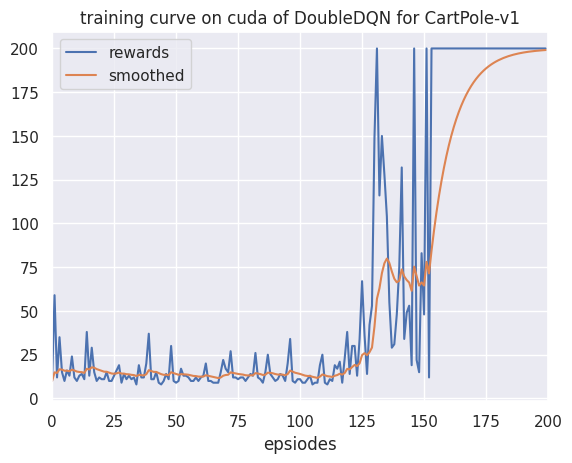

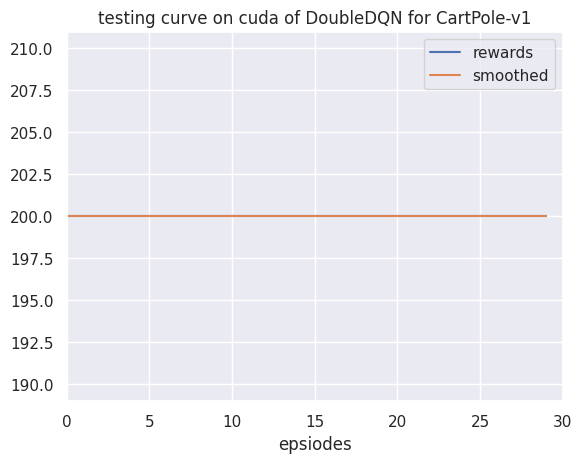

In [2]:
# 获取参数
cfg = Config() 
print_cfgs(cfg)
# 训练
env, agent = env_agent_config(cfg)
best_agent, res_dic = train(cfg, env, agent)
 
plot_rewards(res_dic['rewards'], title=f"training curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")  
# 测试
res_dic = test(cfg, env, agent)
plot_rewards(res_dic['rewards'], title=f"testing curve on {cfg.device} of {cfg.algo_name} for {cfg.env_name}")

In [3]:
from IPython import display
import matplotlib.pyplot as plt
# cfg = Config() 
# env, agent = env_agent_config(cfg)
# draw_agent = agent
draw_agent = agent
draw_agent.policy_net.eval()
NUM_OF_TEST = 1
test_total_reward = []
action_list = []
actions = []
state_list = []
atten_std = []
for i in range(NUM_OF_TEST):
    state = env.reset()
    total_reward = 0
    done = False

    # img = plt.imshow(env.render(mode='rgb_array'))
    while not done:
        action, q_value = draw_agent.predict_action_returnQ(state)
        actions.append(q_value)
        state, reward, done, _ = env.step(action)

        total_reward += reward
        # img.set_data(env.render(mode='rgb_array'))
        # display.display(plt.gcf())
        # display.clear_output(wait=True)

draw_agent.policy_net.train()
print("length of actions is ", len(actions))
for q_value in actions:
    print(q_value.cpu())

length of actions is  500
tensor([[386.8718, 423.1559]], grad_fn=<ToCopyBackward0>)
tensor([[436.6912, 421.6256]], grad_fn=<ToCopyBackward0>)
tensor([[413.9175, 436.7421]], grad_fn=<ToCopyBackward0>)
tensor([[446.4453, 421.2447]], grad_fn=<ToCopyBackward0>)
tensor([[436.9170, 443.8011]], grad_fn=<ToCopyBackward0>)
tensor([[449.9308, 418.0309]], grad_fn=<ToCopyBackward0>)
tensor([[452.0718, 442.5033]], grad_fn=<ToCopyBackward0>)
tensor([[424.0071, 446.4376]], grad_fn=<ToCopyBackward0>)
tensor([[457.1443, 442.1302]], grad_fn=<ToCopyBackward0>)
tensor([[432.8147, 449.4652]], grad_fn=<ToCopyBackward0>)
tensor([[460.6661, 440.8407]], grad_fn=<ToCopyBackward0>)
tensor([[440.4921, 451.4232]], grad_fn=<ToCopyBackward0>)
tensor([[462.7279, 438.6445]], grad_fn=<ToCopyBackward0>)
tensor([[447.1778, 452.4546]], grad_fn=<ToCopyBackward0>)
tensor([[463.3249, 435.4772]], grad_fn=<ToCopyBackward0>)
tensor([[453.0200, 452.5860]], grad_fn=<ToCopyBackward0>)
tensor([[404.1201, 460.2621]], grad_fn=<ToCopy

tensor([[[[2.1961e-07, 5.7863e-08, 9.2775e-07, 3.0291e-04, 1.6554e-01,
           1.0937e-02, 3.7762e-08, 1.8888e-12]]]], grad_fn=<ToCopyBackward0>)

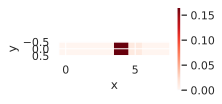

In [4]:
d2l.show_heatmaps(draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu(), 'x', 'y')
draw_agent.policy_net.atten.view(1, 1, 1, 8).cpu()